In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f43227b91c3e432881f0cbb7d6aa0fa


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f43227b91c3e432881f0cbb7d6aa0fa&q=Boston


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mackay
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | henties bay
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | raditsa-krylovka
Processing Record 9 of Set 1 | kumano
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | kasongo-lunda
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pauini
Processing Record 15 of Set 1 | sao jose da coroa grande
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | werda
Processing Record 18 of Set 1 | lolua
City not found. Skipping...
Processing Record 19 of Set 1 | sobolevo
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | mahebourg
Processing Re

Processing Record 39 of Set 4 | troitskaya
Processing Record 40 of Set 4 | damavand
Processing Record 41 of Set 4 | sibenik
Processing Record 42 of Set 4 | darnah
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | faxinal
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | auki
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | praya
Processing Record 49 of Set 4 | gat
Processing Record 50 of Set 4 | xining
Processing Record 1 of Set 5 | uspenka
Processing Record 2 of Set 5 | khormuj
City not found. Skipping...
Processing Record 3 of Set 5 | atambua
Processing Record 4 of Set 5 | ewa beach
Processing Record 5 of Set 5 | rudbar
Processing Record 6 of Set 5 | thunder bay
Processing Record 7 of Set 5 | samana
Processing Record 8 of Set 5 | barcelos
Processing Record 9 of Set 5 | bonfim
Processing Record 10 of Set 5 | cherskiy
Processing Record 11 of Set 5 | bida
Processing Record 12 of Set 5 | gizo
Processing Record 13 of Set

Processing Record 28 of Set 8 | turayf
Processing Record 29 of Set 8 | lagos
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | chokurdakh
Processing Record 32 of Set 8 | boguchany
Processing Record 33 of Set 8 | mpika
Processing Record 34 of Set 8 | carman
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | bulgan
Processing Record 38 of Set 8 | williston
Processing Record 39 of Set 8 | obidos
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | opuwo
Processing Record 42 of Set 8 | bundibugyo
Processing Record 43 of Set 8 | fort saint james
Processing Record 44 of Set 8 | fairbanks
Processing Record 45 of Set 8 | mbandaka
Processing Record 46 of Set 8 | yatou
Processing Record 47 of Set 8 | morehead
Processing Record 48 of Set 8 | sioux lookout
Processing Record 49 of Set 8 | bilibino
Processing Record 50 of Set 8 | songjianghe
Proces

Processing Record 17 of Set 12 | kirakira
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | safonovo
Processing Record 20 of Set 12 | khandbari
Processing Record 21 of Set 12 | kiunga
Processing Record 22 of Set 12 | vanimo
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | ilorin
Processing Record 25 of Set 12 | londoko
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | maarianhamina
Processing Record 28 of Set 12 | maldonado
Processing Record 29 of Set 12 | mandiana
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | benguela
Processing Record 32 of Set 12 | kurilsk
Processing Record 33 of Set 12 | lorengau
Processing Record 34 of Set 12 | bengkulu
Processing Record 35 of Set 12 | bairiki
Processing Record 36 of Set 12 | quelimane
Processing Record 37 of Set 12 | suntar
Processing Record 38 of Set 12 | dudinka
Processing Record 39 of Set 12 | san juan de uraba
Processing Record

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,46.40,70,75,20.80,CL,2020-10-30 05:17:50
1,Mackay,-21.15,149.20,88.00,55,0,19.46,AU,2020-10-30 05:15:52
2,Busselton,-33.65,115.33,89.01,20,0,4.34,AU,2020-10-30 05:17:50
3,Atuona,-9.80,-139.03,78.22,68,60,15.03,PF,2020-10-30 05:17:50
4,Hilo,19.73,-155.09,78.80,83,90,1.92,US,2020-10-30 05:17:50
5,Henties Bay,-22.12,14.28,55.00,93,28,9.10,NA,2020-10-30 05:17:51
6,Flinders,-34.58,150.86,71.01,69,76,4.00,AU,2020-10-30 05:17:51
7,Raditsa-Krylovka,53.32,34.36,39.20,93,75,4.29,RU,2020-10-30 05:17:51
8,Kumano,34.34,132.59,68.00,51,40,9.17,JP,2020-10-30 05:17:51
9,Avarua,-21.21,-159.78,73.40,78,100,5.82,CK,2020-10-30 05:17:52


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604035237.079465

In [16]:
today = time.strftime("%x")
today


'10/29/20'

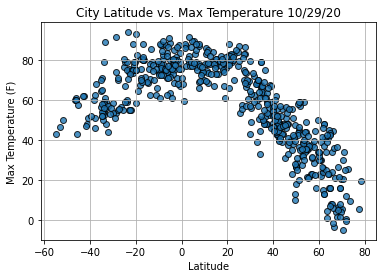

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

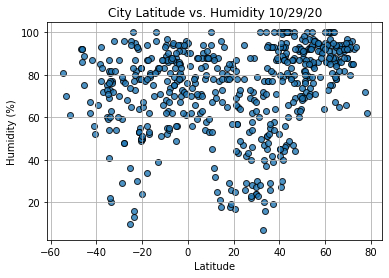

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

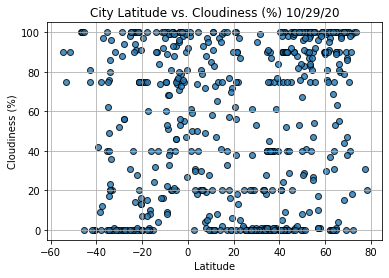

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

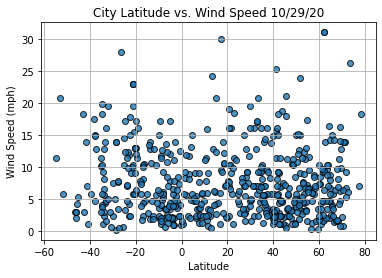

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Hilo,19.73,-155.09,78.80,83,90,1.92,US,2020-10-30 05:17:50
7,Raditsa-Krylovka,53.32,34.36,39.20,93,75,4.29,RU,2020-10-30 05:17:51
8,Kumano,34.34,132.59,68.00,51,40,9.17,JP,2020-10-30 05:17:51
16,Sobolevo,54.43,31.90,44.06,93,100,6.78,RU,2020-10-30 05:17:54
17,Qaanaaq,77.48,-69.36,5.54,72,31,7.05,GL,2020-10-30 05:17:54
...,...,...,...,...,...,...,...,...,...
559,Guarda,40.54,-7.27,44.40,95,0,2.10,PT,2020-10-30 05:17:37
560,Bintulu,3.17,113.03,91.40,66,20,8.05,MY,2020-10-30 05:20:35
561,Lompoc,34.64,-120.46,51.80,93,1,6.89,US,2020-10-30 05:20:36
562,Punta Gorda,26.93,-82.05,81.00,88,20,3.36,US,2020-10-30 05:20:36


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

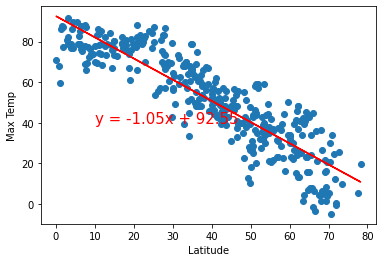

The r-value is: -0.888


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")


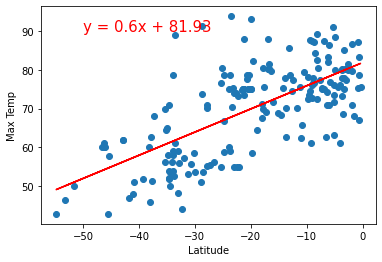

The r-value is: 0.673


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

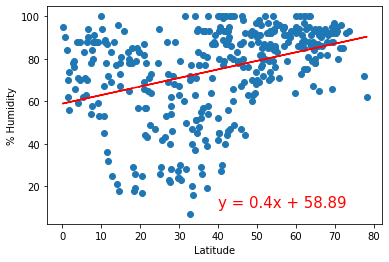

The r-value is: 0.372


In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

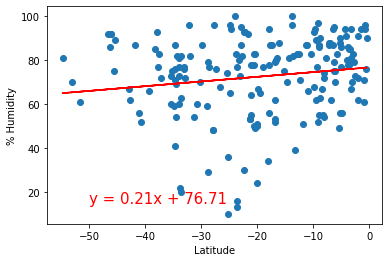

The r-value is: 0.154


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

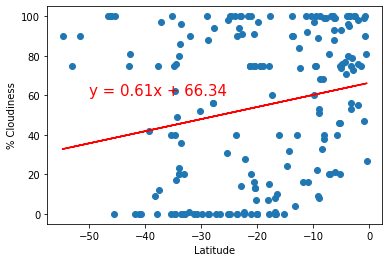

The r-value is: 0.210


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

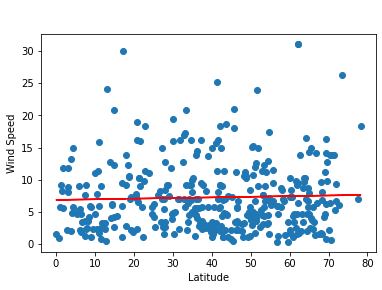

The r-value is: 0.036


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")


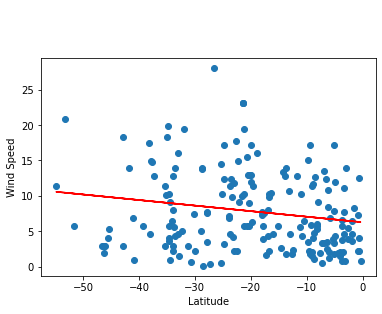

The r-value is: -0.184


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")